##### 问题描述

大家好，我们在用 networkx 显示中文的时候，会发现不能显示中文。 

##### 解决办法

1. 下载Github仓库中的字体SimHei.ttf； 
2. 在 jupyter notebook 中执行
```python
import matplotlib
print(matplotlib.__path__)
```
找到 matplotlib 的路径，然后 cd 到这个路径。 cd 到这个路径之后，继续 cd，cd 到 mpl-data/fonts/ttf 这个路径。 然后把 `DejaVuSans.ttf` 这个文件换成我们刚刚下在的文件。 

```bash
$ mv SimHei.ttf DejaVuSans.ttf
```

其中，用到的 ttf 字体。 我给大家传到附件上了。 

Previous Course

1. What's the language model? OOV problem? 
2. Syntax Tree. lambda 

$$ pr(w) $$

##  Out of Vocabulary(OOV)

Pr(w_o) = constant < Pr(w_1)

##  Language Model: Smooth

In [1]:
import random

In [5]:
"""adj* => adj* adj | adj null"""

def adj():  return random.choice('蓝色的 | 好看的 | 小小的'.split('|')).split()[0]

def adj_star_2():
     return random.choice([lambda : '', lambda : adj() + adj_star_2()])()

def adj_star():
    return random.choice(['', ajd() + adj_star()])

In [ ]:
lambda : adj() + adj_star_2()

In [31]:
numbers = [1, -2, -4, 1, 5, 6, 9, -11]

In [36]:
def absolute(number): 
    if number < 0: return -1 * number
    else:
        return number

In [34]:
absolute(-11)

11

In [38]:
mod_5(6)

1

In [39]:
mod_5(7)

2

In [41]:
def mod_5(number): 
    return number % 5

sorted(numbers, key=lambda x: x % 5)

[5, 1, -4, 1, 6, -2, 9, -11]

In [42]:
mod_5_lambda = lambda x: x % 5

In [43]:
mod_5

<function __main__.mod_5(number)>

In [45]:
mod_5_lambda(19)

4

In [46]:
mod_5(19)

4

In [30]:
adj_star_2()

'蓝色的'

## Search Policy

 我们根据中国的城市，做一个简易版的导航地图
 
### 得到文本数据

In [2]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [3]:
print(type(coordination_source))

<class 'str'>


In [4]:
city_location = {
    '香港': (114.17, 22.28)
}

Input: String -> dict

In [5]:
test_string = "{name:'兰州', geoCoord:[103.73, 36.03]},"

In [6]:
import re

### 使用正则表达式将文本数据转换为数字

关于正则表达式的更多信息，[查看这里](https://www.runoob.com/python/python-reg-expressions.html)和[这里](http://funhacks.net/2016/12/27/regular_expression/)

In [7]:
pattern = re.compile(r"name:'(\w+)',\s+geoCoord:\[(\d+.\d+),\s(\d+.\d+)\]")

In [8]:
for line in coordination_source.split('\n'):
    city_info = pattern.findall(line)
    if not city_info: continue
    
    # following: we find the city info
    
    city, long, lat = city_info[0]
    
    long, lat = float(long), float(lat)
    
    city_location[city] = (long, lat)

In [9]:
city_location

{'上海': (121.48, 31.22),
 '乌鲁木齐': (87.68, 43.77),
 '兰州': (103.73, 36.03),
 '北京': (116.46, 39.92),
 '南京': (118.78, 32.04),
 '南宁': (108.33, 22.84),
 '南昌': (115.89, 28.68),
 '台湾': (121.3, 25.03),
 '合肥': (117.27, 31.86),
 '呼和浩特': (111.65, 40.82),
 '哈尔滨': (126.63, 45.75),
 '嘉峪关': (98.17, 39.47),
 '天津': (117.2, 39.13),
 '太原': (112.53, 37.87),
 '广州': (113.23, 23.16),
 '成都': (104.06, 30.67),
 '拉萨': (102.73, 25.04),
 '杭州': (120.19, 30.26),
 '武汉': (114.31, 30.52),
 '沈阳': (123.38, 41.8),
 '济南': (117.0, 36.65),
 '海口': (110.35, 20.02),
 '澳门': (113.54, 22.19),
 '石家庄': (114.48, 38.03),
 '福州': (119.3, 26.08),
 '西宁': (101.74, 36.56),
 '西安': (108.95, 34.27),
 '西藏': (91.11, 29.97),
 '贵阳': (106.71, 26.57),
 '郑州': (113.65, 34.76),
 '重庆': (106.54, 29.59),
 '银川': (106.27, 38.47),
 '长春': (125.35, 43.88),
 '长沙': (113.0, 28.21),
 '香港': (114.17, 22.28)}

In [10]:
print(type(city_location))

<class 'dict'>


In [11]:
import math

### 计算两个城市之间的距离

下面这个函数可以直接用，不需要掌握

In [12]:
def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [13]:
def get_geo_distance(city1, city2):
    return geo_distance(city_location[city1], city_location[city2])

In [14]:
get_geo_distance('上海', '杭州')

153.5185697155768

### 创建一个地图

In [15]:
import networkx as nx

In [16]:
city_graph = nx.Graph()

In [17]:
city_graph.add_nodes_from(list(city_location.keys()))

In [18]:
%matplotlib inline

In [19]:
import matplotlib.pyplot as plt

In [20]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

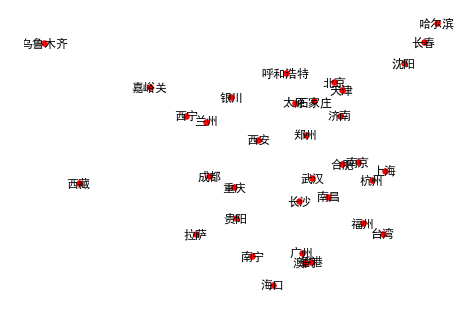

In [21]:
nx.draw(city_graph, city_location, with_labels=True, node_size=30)

### 获取两个城市之间的最优路径

先从简单的例子开始:北京出发到福州

In [22]:
simple_connection_info = {
    '北京':['太原'],
    '太原':['北京','西安','郑州'],
    '兰州':['西安'],
    '郑州': ['太原'],
    '西安':['兰州','长沙'],
    '长沙':['福州','南宁'],
    '沈阳': ['北京']
}

In [23]:
simple_connection_info['西安']

['兰州', '长沙']

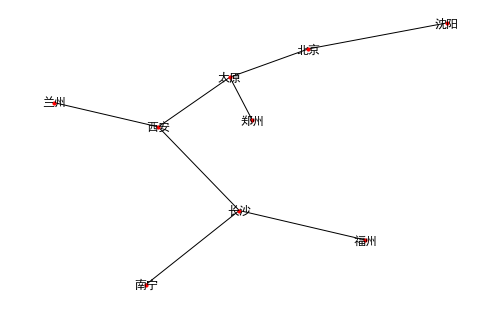

In [24]:
nx.draw(nx.Graph(simple_connection_info),city_location,with_labels=True,node_size=10)

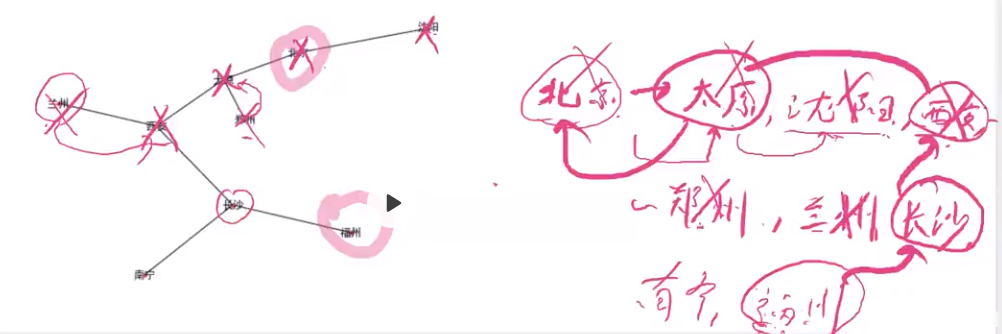

#### 广度优先遍历

In [25]:
def search(start,destination,conncetion_graph):
    pathes = [[start]]
    visitied = set()
    
    while pathes: # 当我们发现还有路走的时候
        path = pathes.pop(0)
        froninter = path[-1] # -1 代表这条路的最后一个城市
        
        if froninter in visitied:continue
        successors = conncetion_graph[froninter]
        
        for city in successors:
            if city in path:continue # eliminate loop 可以把这行注释掉，查看区别
            new_path = path + [city]
            print(new_path)
            pathes.append(new_path)
            if city == destination:return new_path
            
        visitied.add(froninter)

In [26]:
search('兰州', '福州', simple_connection_info)

['兰州', '西安']
['兰州', '西安', '长沙']
['兰州', '西安', '长沙', '福州']


['兰州', '西安', '长沙', '福州']

In [27]:
def pretty_print(cities):
    print('🚗->'.join(cities))

In [28]:
pretty_print(search('北京', '福州', simple_connection_info))

['北京', '太原']
['北京', '太原', '西安']
['北京', '太原', '郑州']
['北京', '太原', '西安', '兰州']
['北京', '太原', '西安', '长沙']
['北京', '太原', '西安', '长沙', '福州']
北京🚗->太原🚗->西安🚗->长沙🚗->福州


##### 广度优先的函数实现

给定一个初始点(北京)，把图中的点全部走一遍

In [29]:
from collections import defaultdict

In [30]:
simple_connection_info_src = {
    '北京':['太原','沈阳'],
    '太原':['北京','西安','郑州'],
    '兰州':['西安'],
    '郑州': ['太原'],
    '西安':['兰州','长沙'],
    '长沙':['福州','南宁'],
    '沈阳': ['北京']
}

In [31]:
simple_connection_info = defaultdict(list)

In [32]:
simple_connection_info.update(simple_connection_info_src)

`defaultdict`的作用是在于，当字典里的`key`不存在但被查找时，返回的不是`keyError`而是一个默认值.

`defaultdict`接受一个工厂函数作为参数，如下来构造：

```
dict =defaultdict( factory_function)
```
这个`factory_function`可以是`list、set、str`等等，作用是当`key`不存在时，返回的是工厂函数的默认值，比如
- list对应[ ]
- str对应的是空字符串
- set对应set( )
- int对应0

如下举例：



In [ ]:
simple_connection_info_src['澳门']

In [34]:
simple_connection_info['澳门']

[]

In [44]:
dict1 = defaultdict(int)
dict2 = defaultdict(set)
dict3 = defaultdict(str)
dict4 = defaultdict(list)
dict1[2] ='two'

print(dict1[1])
print(dict2[1])
print(dict3[1])
print(dict4[1])


0
set()

[]


In [35]:
def bfs(graph, start):
    """
    breath first search
    """
    visited = [start]
    
    seen = set()
    
    while visited:
        froninter = visited.pop() #
        
        if froninter in seen: continue
        
        for successor in graph[froninter]:
            if successor in seen: continue # 把环去掉
            print(successor)
#             visited.append(successor)
            #visited = visited + [successor] # 我们每次扩展都扩展最新发现的点 -> depth first
            visited = [successor] + visited # 我们每次扩展都先考虑已经发现的 老的点 -> breath first
            
        seen.add(froninter)
    
    return seen

In [36]:
bfs(simple_connection_info,'北京')

太原
沈阳
西安
郑州
兰州
长沙
福州
南宁


{'兰州', '北京', '南宁', '太原', '沈阳', '福州', '西安', '郑州', '长沙'}

#### 深度优先遍历

In [37]:
def dfs(graph, start):
    """
    breath first search
    """
    visited = [start]
    
    seen = set()
    
    while visited:
        froninter = visited.pop() #
        
        if froninter in seen: continue
        
        for successor in graph[froninter]:
            if successor in seen: continue # 把环去掉
            print(successor)
            
            visited = visited + [successor] # 我们每次扩展都扩展最新发现的点 -> depth first
#             visited = [successor] + visited # 我们每次扩展都先考虑已经发现的 老的点 -> breath first
            
            # 所以说，这个扩展顺序其实是决定了我们的深度优先还是广度优先
    
        seen.add(froninter)
    
    return seen

In [38]:
number_grpah = defaultdict(list)

number_grpah.update({
    1: [2, 3],
    2: [1, 4], 
    3: [1, 5],
    4: [2, 6], 
    5: [3, 7],
    7: [5, 8]
})

In [39]:
dfs(simple_connection_info,'北京')

太原
沈阳
西安
郑州
兰州
长沙
福州
南宁


{'兰州', '北京', '南宁', '太原', '沈阳', '福州', '西安', '郑州', '长沙'}

```
visited = visited + [successor] # 我们每次扩展都扩展最新发现的点 -> depth first

visited = [successor] + visited # 我们每次扩展都先考虑已经发现的 老的点 -> breath first
```

In [40]:
dfs(number_grpah, 1)

2
3
5
7
8
4
6


{1, 2, 3, 4, 5, 6, 7, 8}

In [41]:
bfs(number_grpah, 1)

2
3
4
5
6
7
8


{1, 2, 3, 4, 5, 6, 7, 8}

#### 按照转乘最少进行扩展

In [42]:
threshold = 300

In [43]:
city_connection = defaultdict(list)

In [45]:
for c1 in city_location:
    for c2 in city_location:
        if c1 == c2: continue
        
        distance = get_geo_distance(c1, c2)
        
        if distance < threshold:
            city_connection[c1].append(c2)
            city_connection[c2].append(c1)

In [48]:
city_connection

defaultdict(list,
            {'上海': ['杭州', '杭州'],
             '兰州': ['西宁', '成都', '西宁', '成都', '银川', '银川'],
             '北京': ['济南', '济南', '石家庄', '天津', '石家庄', '天津'],
             '南京': ['杭州', '合肥', '杭州', '合肥'],
             '南宁': ['贵阳', '海口', '贵阳', '海口'],
             '南昌': ['合肥', '武汉', '合肥', '武汉'],
             '台湾': ['福州', '福州'],
             '合肥': ['南昌', '济南', '南昌', '济南', '南京', '南京'],
             '呼和浩特': ['太原', '太原'],
             '哈尔滨': ['长春', '长春'],
             '天津': ['济南', '北京', '济南', '北京'],
             '太原': ['呼和浩特', '石家庄', '呼和浩特', '石家庄', '郑州', '郑州'],
             '广州': ['澳门', '长沙', '澳门', '长沙', '香港', '香港'],
             '成都': ['西宁', '西宁', '兰州', '拉萨', '重庆', '兰州', '拉萨', '重庆'],
             '拉萨': ['西宁', '成都', '西宁', '成都'],
             '杭州': ['上海', '上海', '南京', '福州', '南京', '福州'],
             '武汉': ['南昌', '长沙', '南昌', '长沙', '郑州', '郑州'],
             '沈阳': ['长春', '长春'],
             '济南': ['合肥', '北京', '石家庄', '天津', '合肥', '北京', '石家庄', '天津'],
             '海口': ['南宁', '南宁'],
         

In [49]:
city_with_road = nx.Graph(city_connection)

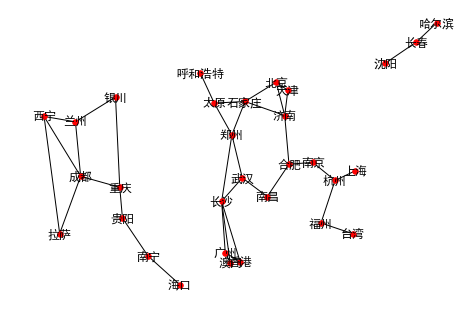

In [50]:
nx.draw(city_with_road, city_location, with_labels=True, node_size=30)

In [51]:
search('北京', '南京', city_connection)

['北京', '济南']
['北京', '济南']
['北京', '石家庄']
['北京', '天津']
['北京', '石家庄']
['北京', '天津']
['北京', '济南', '合肥']
['北京', '济南', '石家庄']
['北京', '济南', '天津']
['北京', '济南', '合肥']
['北京', '济南', '石家庄']
['北京', '济南', '天津']
['北京', '石家庄', '济南']
['北京', '石家庄', '济南']
['北京', '石家庄', '太原']
['北京', '石家庄', '郑州']
['北京', '石家庄', '太原']
['北京', '石家庄', '郑州']
['北京', '天津', '济南']
['北京', '天津', '济南']
['北京', '济南', '合肥', '南昌']
['北京', '济南', '合肥', '南昌']
['北京', '济南', '合肥', '南京']


['北京', '济南', '合肥', '南京']

In [52]:
search('北京', '长沙', city_connection)

['北京', '济南']
['北京', '济南']
['北京', '石家庄']
['北京', '天津']
['北京', '石家庄']
['北京', '天津']
['北京', '济南', '合肥']
['北京', '济南', '石家庄']
['北京', '济南', '天津']
['北京', '济南', '合肥']
['北京', '济南', '石家庄']
['北京', '济南', '天津']
['北京', '石家庄', '济南']
['北京', '石家庄', '济南']
['北京', '石家庄', '太原']
['北京', '石家庄', '郑州']
['北京', '石家庄', '太原']
['北京', '石家庄', '郑州']
['北京', '天津', '济南']
['北京', '天津', '济南']
['北京', '济南', '合肥', '南昌']
['北京', '济南', '合肥', '南昌']
['北京', '济南', '合肥', '南京']
['北京', '济南', '合肥', '南京']
['北京', '石家庄', '太原', '呼和浩特']
['北京', '石家庄', '太原', '呼和浩特']
['北京', '石家庄', '太原', '郑州']
['北京', '石家庄', '太原', '郑州']
['北京', '石家庄', '郑州', '长沙']


['北京', '石家庄', '郑州', '长沙']

####  最少换乘优先

In [54]:
def search(start, destination, connection_grpah, sort_candidate):
    pathes = [[start]]
    
    visitied = set()
    
    while pathes: # if we find existing pathes
        path = pathes.pop(0)
        froninter = path[-1]
        
        if froninter in visitied: continue
            
        successors = connection_grpah[froninter]
        
        for city in successors:
            if city in path: continue  # eliminate loop
                
            new_path = path + [city]
            
            pathes.append(new_path)
            
            if city == destination: return new_path
        
        visitied.add(froninter)
        
        pathes = sort_candidate(pathes) # 我们可以加一个排序函数 对我们的搜索策略进行控制

In [55]:
# 最少站数优先
def transfer_stations_first(pathes): 
    return sorted(pathes, key=len)

In [56]:
search('兰州', '福州', simple_connection_info, sort_candidate=transfer_stations_first)

['兰州', '西安', '长沙', '福州']

In [65]:
pretty_print(search('北京', '广州', city_connection, sort_candidate=transfer_stations_first))

北京🚗->石家庄🚗->郑州🚗->长沙🚗->广州


#### 最短距离优先

In [57]:
def shortest_path_first(pathes):
    
    if len(pathes) <= 1: return pathes
    
    def get_path_distnace(path):
        distance = 0
        for i in range(1, len(path)):
            distance += get_geo_distance(path[i - 1], path[i])
            
        return distance

    return sorted(pathes, key=get_path_distnace)# 在每次排序的时候，key是每条候选路径的距离

In [61]:
pretty_print(search('兰州', '福州', simple_connection_info, sort_candidate=shortest_path_first))

兰州🚗->西安🚗->长沙🚗->福州


In [60]:
pretty_print(search('北京', '广州', city_connection, sort_candidate=shortest_path_first))

北京🚗->石家庄🚗->郑州🚗->长沙🚗->广州


#### 最多换乘优先

In [63]:
def transfer_as_much_possible(pathes):
    return sorted(pathes, key=len, reverse=True)

In [64]:
pretty_print(search('北京', '广州', city_connection, sort_candidate=transfer_as_much_possible))

北京🚗->济南🚗->合肥🚗->南昌🚗->武汉🚗->长沙🚗->广州


## Assignment

#### 北京地铁换乘

1. 网络爬虫 + 正则
2. 数据处理
3. 算法的应用能力

In [67]:
import requests

In [68]:
url = 'https://movie.douban.com/subject/26931786/?from=showing'

In [69]:
response = requests.get(url)

In [ ]:
response.text

In [70]:
what_we_want = r'<a href="https://(movie\.douban\.com/subject/\d+/\?from=subject-page)" class="" '

In [71]:
pattern = re.compile(what_we_want)

In [72]:
likes = pattern.findall(response.text)

In [73]:
for like in likes:
    print(like)

movie.douban.com/subject/24753477/?from=subject-page
movie.douban.com/subject/26100958/?from=subject-page
movie.douban.com/subject/25820460/?from=subject-page
movie.douban.com/subject/1432146/?from=subject-page
movie.douban.com/subject/25937854/?from=subject-page
movie.douban.com/subject/1866473/?from=subject-page
movie.douban.com/subject/25821634/?from=subject-page
movie.douban.com/subject/26213252/?from=subject-page
movie.douban.com/subject/25828589/?from=subject-page
movie.douban.com/subject/4920389/?from=subject-page


## Machine Learning

In [1]:
from sklearn.datasets import load_boston

In [2]:
data = load_boston()

In [3]:
X, y = data['data'], data['target']

In [4]:
X[1]

array([2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
       6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
       1.7800e+01, 3.9690e+02, 9.1400e+00])

In [5]:
y[1]

21.6

In [6]:
len(X[:, 0])

506

In [7]:
len(y)

506

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

In [12]:
def draw_rm_and_price():
    plt.scatter(X[:, 5], y)

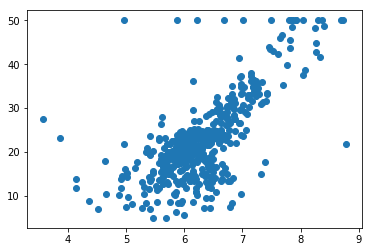

In [13]:
draw_rm_and_price()

In [14]:
import random

In [15]:
def price(rm, k, b):
    """f(x) = k * x + b"""
    return k * rm + b  

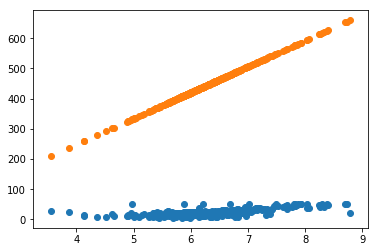

In [16]:
X_rm = X[:, 5]
k = random.randint(-100, 100)
b = random.randint(-100, 100)
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

draw_rm_and_price() 
plt.scatter(X_rm, price_by_random_k_and_b)

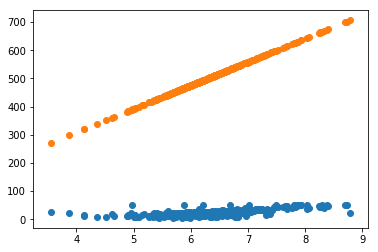

In [17]:
X_rm = X[:, 5]
k = random.randint(-100, 100)
b = random.randint(-100, 100)
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

$$ \hat{y} $$

In [18]:
list(y)

[24.0,
 21.6,
 34.7,
 33.4,
 36.2,
 28.7,
 22.9,
 27.1,
 16.5,
 18.9,
 15.0,
 18.9,
 21.7,
 20.4,
 18.2,
 19.9,
 23.1,
 17.5,
 20.2,
 18.2,
 13.6,
 19.6,
 15.2,
 14.5,
 15.6,
 13.9,
 16.6,
 14.8,
 18.4,
 21.0,
 12.7,
 14.5,
 13.2,
 13.1,
 13.5,
 18.9,
 20.0,
 21.0,
 24.7,
 30.8,
 34.9,
 26.6,
 25.3,
 24.7,
 21.2,
 19.3,
 20.0,
 16.6,
 14.4,
 19.4,
 19.7,
 20.5,
 25.0,
 23.4,
 18.9,
 35.4,
 24.7,
 31.6,
 23.3,
 19.6,
 18.7,
 16.0,
 22.2,
 25.0,
 33.0,
 23.5,
 19.4,
 22.0,
 17.4,
 20.9,
 24.2,
 21.7,
 22.8,
 23.4,
 24.1,
 21.4,
 20.0,
 20.8,
 21.2,
 20.3,
 28.0,
 23.9,
 24.8,
 22.9,
 23.9,
 26.6,
 22.5,
 22.2,
 23.6,
 28.7,
 22.6,
 22.0,
 22.9,
 25.0,
 20.6,
 28.4,
 21.4,
 38.7,
 43.8,
 33.2,
 27.5,
 26.5,
 18.6,
 19.3,
 20.1,
 19.5,
 19.5,
 20.4,
 19.8,
 19.4,
 21.7,
 22.8,
 18.8,
 18.7,
 18.5,
 18.3,
 21.2,
 19.2,
 20.4,
 19.3,
 22.0,
 20.3,
 20.5,
 17.3,
 18.8,
 21.4,
 15.7,
 16.2,
 18.0,
 14.3,
 19.2,
 19.6,
 23.0,
 18.4,
 15.6,
 18.1,
 17.4,
 17.1,
 13.3,
 17.8,
 14.0,
 14.4,
 13.4,

In [19]:
price_by_random_k_and_b

[522.725,
 509.943,
 573.355,
 557.8340000000001,
 570.201,
 510.68999999999994,
 475.996,
 489.27599999999995,
 444.37300000000005,
 475.33199999999994,
 506.29099999999994,
 475.747,
 465.78700000000003,
 470.767,
 482.968,
 461.222,
 469.60499999999996,
 474.17,
 429.848,
 452.341,
 439.31,
 472.09499999999997,
 486.786,
 459.479,
 468.692,
 441.71700000000004,
 459.479,
 478.90099999999995,
 516.085,
 530.942,
 451.17900000000003,
 480.976,
 470.85,
 450.183,
 482.968,
 469.43899999999996,
 461.803,
 462.54999999999995,
 472.178,
 524.385,
 559.992,
 538.91,
 489.02699999999993,
 492.51300000000003,
 480.727,
 448.60600000000005,
 457.23799999999994,
 477.49,
 425.117,
 441.966,
 471.92900000000003,
 484.545,
 517.413,
 474.834,
 465.704,
 578.6669999999999,
 506.789,
 542.728,
 487.03499999999997,
 468.941,
 453.503,
 472.178,
 512.8480000000001,
 538.246,
 566.6320000000001,
 499.07000000000005,
 457.32099999999997,
 464.874,
 441.302,
 465.455,
 509.611,
 471.76300000000003,
 48

In [20]:
[1, 1, 1]
[2, 2, 2]

[2, 2, 2]

###  loss

$$ loss = \frac{1}{n} \sum{(y_i - \hat{y_i})}$$

In [21]:
def loss(y, y_hat): # to evaluate the performance 
    return sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

###  First-Method: Random generation: get best k and best b

In [22]:
X_rm = X[:, 5]

In [23]:
trying_times = 2000

min_loss = float('inf')
best_k, best_b = None, None

for i in range(trying_times):
    k = random.random() * 200 - 100
    b = random.random() * 200 - 100
    price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

    current_loss = loss(y, price_by_random_k_and_b)
    
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = k, b
        print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))

When time is : 0, get best_k: 22.87933309746073 best_b: -86.15473328097998, and the loss is: 1369.179386014382
When time is : 2, get best_k: 3.3216995344439226 best_b: -30.12116932831168, and the loss is: 1069.9239360091676
When time is : 25, get best_k: 0.7412708771106225 best_b: 28.694621349014312, and the loss is: 195.12346506873948
When time is : 51, get best_k: 11.616350810528516 best_b: -52.41687214385702, and the loss is: 50.498731393346496
When time is : 279, get best_k: 6.039708405757139 best_b: -15.781785170782413, and the loss is: 48.34880893656799
When time is : 1901, get best_k: 10.550568414900255 best_b: -45.00945763802395, and the loss is: 46.16144235719699


In [24]:
10 ** 0.5

3.1622776601683795

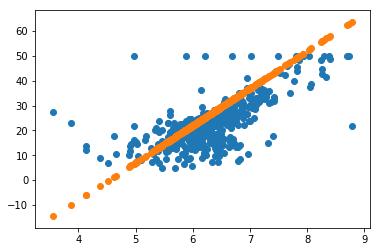

In [25]:
X_rm = X[:, 5]
k = 15
b = -68
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

###  2nd-Method: Direction Adjusting

In [26]:
trying_times = 2000

min_loss = float('inf')

best_k = random.random() * 200 - 100
best_b = random.random() * 200 - 100

direction = [
    (+1, -1),  # first element: k's change direction, second element: b's change direction
    (+1, +1), 
    (-1, -1), 
    (-1, +1),
]

next_direction = random.choice(direction)

scalar = 0.1

for i in range(trying_times):
    
    k_direction, b_direction = next_direction
    
    current_k, current_b = best_k + k_direction * scalar, best_b + b_direction * scalar
    
    price_by_k_and_b = [price(r, current_k, current_b) for r in X_rm]

    current_loss = loss(y, price_by_k_and_b)
    
    if current_loss < min_loss: # performance became better
        min_loss = current_loss
        best_k, best_b = current_k, current_b
        
        next_direction = next_direction
        print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))
    else:
        next_direction = random.choice(direction)

When time is : 0, get best_k: 66.9100321099254 best_b: 41.02525419933723, and the loss is: 194408.90481607636
When time is : 2, get best_k: 66.8100321099254 best_b: 40.92525419933723, and the loss is: 193764.15675445713
When time is : 3, get best_k: 66.71003210992541 best_b: 40.82525419933723, and the loss is: 193120.47986470547
When time is : 4, get best_k: 66.61003210992541 best_b: 40.72525419933723, and the loss is: 192477.87414682168
When time is : 5, get best_k: 66.51003210992542 best_b: 40.62525419933723, and the loss is: 191836.33960080487
When time is : 6, get best_k: 66.41003210992542 best_b: 40.525254199337226, and the loss is: 191195.87622665585
When time is : 7, get best_k: 66.31003210992543 best_b: 40.425254199337225, and the loss is: 190556.484024374
When time is : 8, get best_k: 66.21003210992544 best_b: 40.32525419933722, and the loss is: 189918.16299395956
When time is : 9, get best_k: 66.11003210992544 best_b: 40.22525419933722, and the loss is: 189280.91313541305
Whe

When time is : 417, get best_k: 25.31003210992501 best_b: -0.5747458006630819, and the loss is: 18657.26678256873
When time is : 418, get best_k: 25.21003210992501 best_b: -0.6747458006630819, and the loss is: 18458.12621781728
When time is : 419, get best_k: 25.110032109925008 best_b: -0.7747458006630819, and the loss is: 18260.056824933312
When time is : 420, get best_k: 25.010032109925007 best_b: -0.8747458006630818, and the loss is: 18063.05860391682
When time is : 421, get best_k: 24.910032109925005 best_b: -0.9747458006630818, and the loss is: 17867.131554767802
When time is : 422, get best_k: 24.810032109925004 best_b: -1.074745800663082, and the loss is: 17672.275677486243
When time is : 423, get best_k: 24.710032109925002 best_b: -1.174745800663082, and the loss is: 17478.49097207218
When time is : 424, get best_k: 24.610032109925 best_b: -1.274745800663082, and the loss is: 17285.777438525554
When time is : 425, get best_k: 24.510032109925 best_b: -1.3747458006630822, and the

如果我们想得到更快的更新，在更短的时间内获得更好的结果，我们需要一件事情：

#### 找对改变的方向

#### 如何找对改变的方向呢？ 

#### 2nd-method: 监督让他变化--> 监督学习

###  导数

In [27]:
loss([1, 1, 1], [2, 2, 3])

2.0

In [28]:
loss([1, 1, 1], [1, 1, 1])

0.0

In [29]:
data['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [30]:
data['DESCR']

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000